In [1]:
import numpy as np
import pandas as pd

#### Read Data

In [2]:
data=pd.read_csv('mobile_addiction.csv')

#### Getting to know data

In [3]:
data.head()

,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,0,2,29,0,0,49,0,44,5,3,35,not addicted
1,1,6,29,1,2,65,1,29,5,9,21,addicted
2,2,9,28,2,0,57,3,28,7,5,39,addicted
3,3,6,39,2,0,69,1,28,6,8,24,addicted
4,4,5,37,3,1,64,2,27,4,5,26,addicted


In [4]:
data.shape

(13589, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          13589 non-null  int64 
 1   daily_screen_time   13589 non-null  int64 
 2   app_sessions        13589 non-null  int64 
 3   social_media_usage  13589 non-null  int64 
 4   gaming_time         13589 non-null  int64 
 5   notifications       13589 non-null  int64 
 6   night_usage         13589 non-null  int64 
 7   age                 13589 non-null  int64 
 8   work_study_hours    13589 non-null  int64 
 9   stress_level        13589 non-null  int64 
 10  apps_installed      13589 non-null  int64 
 11  addicted            13589 non-null  object
dtypes: int64(11), object(1)
memory usage: 1.2+ MB


In [6]:
data.describe()
#After seeing the statistics, the data seems to be not skewed as its mean is almost equal to the median

,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000
mean,6794.000000,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048
std,3922.950739,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790
min,0.000000,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000
25%,3397.000000,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000
50%,6794.000000,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000
75%,10191.000000,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000
max,13588.000000,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000


#### Data Preprocessing

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape  #No duplicates detected

(13589, 12)

In [9]:
data.columns

Index(['Unnamed: 0', 'daily_screen_time', 'app_sessions', 'social_media_usage',
       'gaming_time', 'notifications', 'night_usage', 'age',
       'work_study_hours', 'stress_level', 'apps_installed', 'addicted'],
      dtype='object')

In [10]:
#remove Unnamed: 0 column (Not useful for the model)
data.drop(["Unnamed: 0"], axis=1, inplace=True) 

In [11]:
data.shape

(13589, 11)

In [12]:
data.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,2,29,0,0,49,0,44,5,3,35,not addicted
1,6,29,1,2,65,1,29,5,9,21,addicted
2,9,28,2,0,57,3,28,7,5,39,addicted
3,6,39,2,0,69,1,28,6,8,24,addicted
4,5,37,3,1,64,2,27,4,5,26,addicted


In [13]:
data.isnull().sum() #No null values detected

daily_screen_time     0
app_sessions          0
social_media_usage    0
gaming_time           0
notifications         0
night_usage           0
age                   0
work_study_hours      0
stress_level          0
apps_installed        0
addicted              0
dtype: int64

In [14]:
data['addicted'].value_counts()
#No null values detected, and no bias detected

addicted
addicted        6846
not addicted    6743
Name: count, dtype: int64

In [15]:
import plotly.express as px

#to show outliers for all numerical columns
for column in data.select_dtypes(include=['number']).columns:
	fig = px.box(data, x=column, title= f'Box plot for {column}')
	fig.show()

##### The outliers are not significant relative to the total number of samples

In [16]:
data.describe()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000
mean,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048
std,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790
min,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000
25%,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000
50%,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000
75%,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000
max,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000


### Data Visualization

In [17]:
#Categoraize "daily_screen_time" column to show correlation with the target column "addicted"
def daily_screen_time_levels(col):
    if col<=4:
        return "Low"
    elif col<=8:
        return "Intermediate"
    else:
        return "High"

data["daily_screen_time_levels"] = data["daily_screen_time"].apply(daily_screen_time_levels)

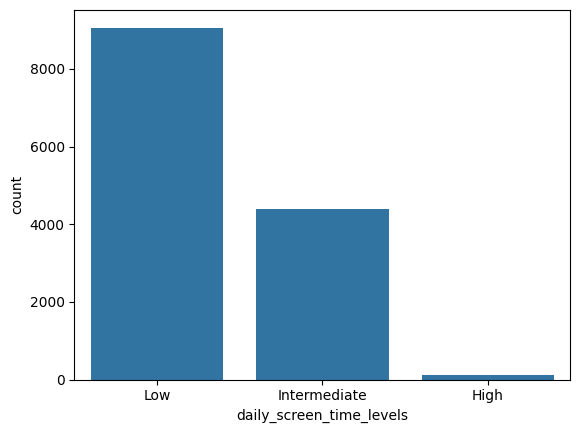

In [18]:
#count plot daily_screen_time_levels
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='daily_screen_time_levels',data=data) #only take the x axis
plt.show()

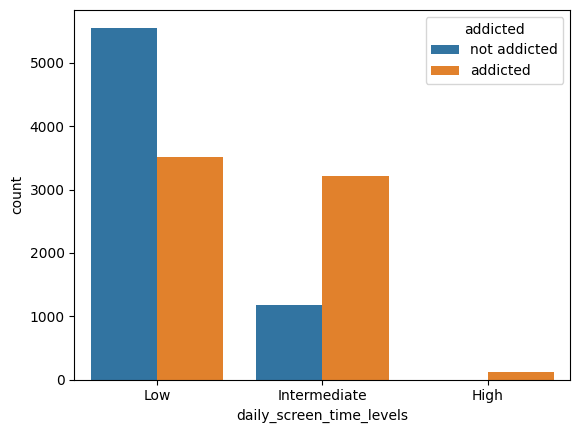

In [19]:
#add the addicted hue
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='daily_screen_time_levels',data=data,hue="addicted")#only take the x axis
plt.show()

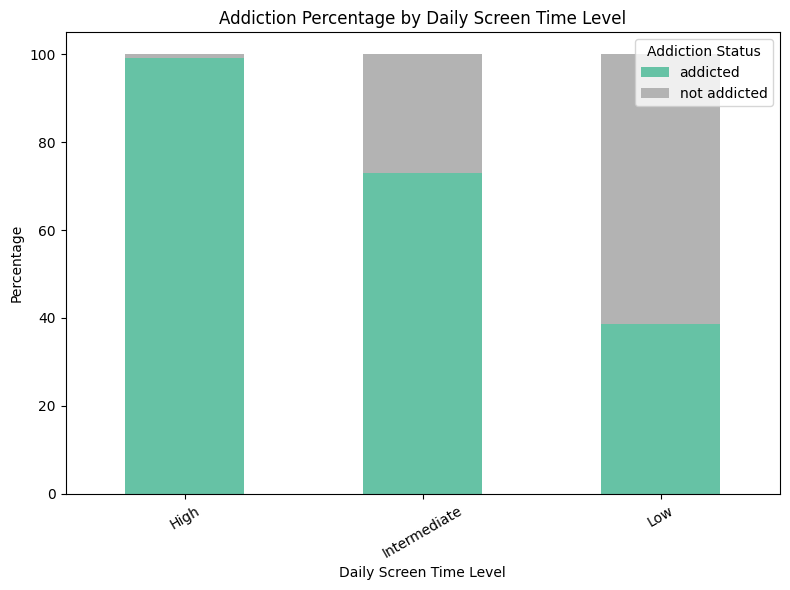

In [20]:
#show the percent of addicted people in each category to be more expressive
import matplotlib.pyplot as plt

# Group by screen time levels and addiction status
grouped = data.groupby(['daily_screen_time_levels', 'addicted'], observed=True).size().reset_index(name='count')

# Calculate percentages within each screen time level
total_per_bin = grouped.groupby('daily_screen_time_levels', observed=True)['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_bin * 100

# Pivot the data for stacked bar plot
pivot = grouped.pivot(index='daily_screen_time_levels', columns='addicted', values='percentage').fillna(0)

# Rename columns to readable labels
column_map = {0: 'Not Addicted', 1: 'Addicted'}
pivot.columns = [column_map.get(c, str(c)) for c in pivot.columns]

# Plot
pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Addiction Percentage by Daily Screen Time Level')
plt.xlabel('Daily Screen Time Level')
plt.ylabel('Percentage')
plt.legend(title='Addiction Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


From the chart above, We've concluded that almost there are no not-addicted people who used their mobile from 8 to 12 hours daily

In [21]:
#Categoraize "social_media_usage" column to show correlation with the target column "addicted"
def social_media_usage_levels(col):
    if col<=1:
        return "Low"
    elif col<=4:
        return "Intermediate"
    else:
        return "High"

data["social_media_usage_levels"] = data["social_media_usage"].apply(social_media_usage_levels)

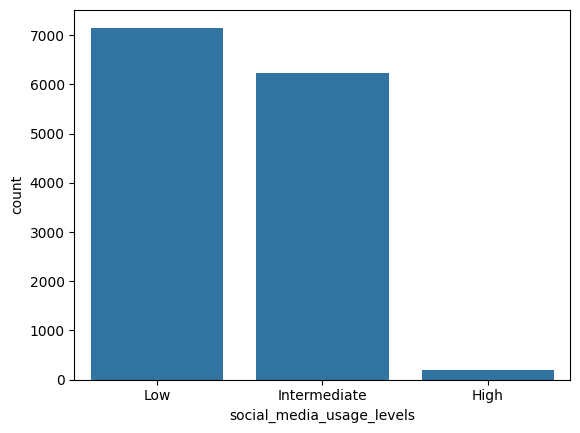

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='social_media_usage_levels',data=data)
plt.show()

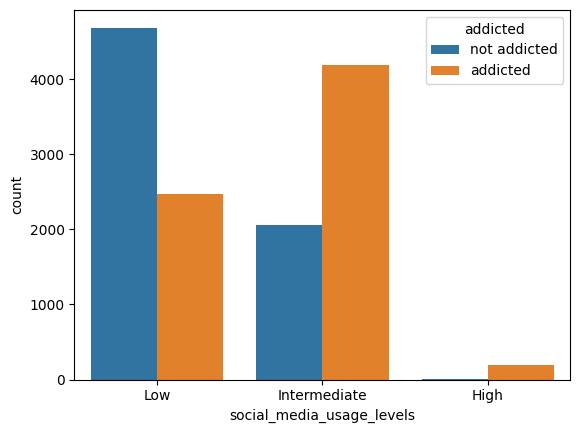

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='social_media_usage_levels',data=data,hue="addicted")
plt.show()

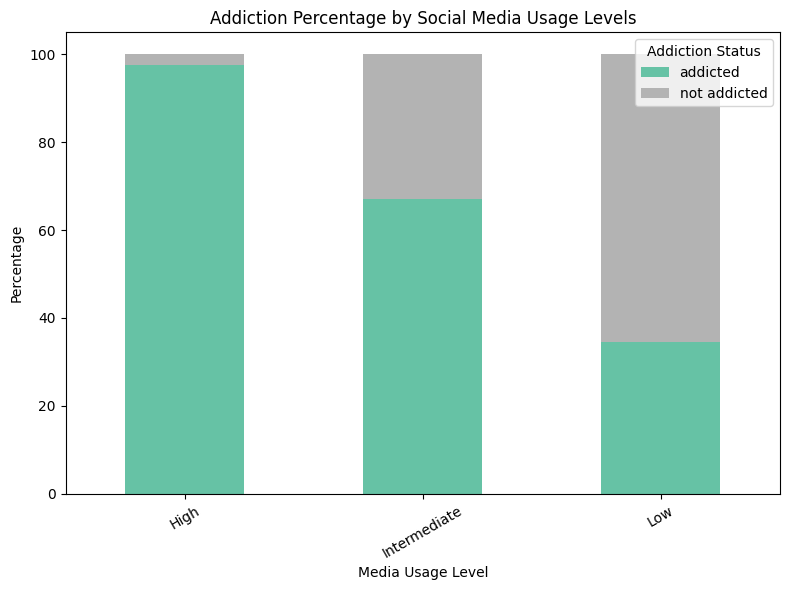

In [24]:
import matplotlib.pyplot as plt

grouped = data.groupby(['social_media_usage_levels', 'addicted'], observed=True).size().reset_index(name='count')

total_per_bin = grouped.groupby('social_media_usage_levels', observed=True)['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_bin * 100

pivot = grouped.pivot(index='social_media_usage_levels', columns='addicted', values='percentage').fillna(0)

column_map = {0: 'Not Addicted', 1: 'Addicted'}
pivot.columns = [column_map.get(c, str(c)) for c in pivot.columns]


pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Addiction Percentage by Social Media Usage Levels')
plt.xlabel('Media Usage Level')
plt.ylabel('Percentage')
plt.legend(title='Addiction Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


The more people use socail media, the more probably they will be addicted to phone usage.

In [25]:
#Categoraize "night_usage" column to show correlation with the target column "addicted"
def night_usage_levels(col):
    if col<=1:
        return "Low"
    elif col<=4:
        return "Intermediate"
    else:
        return "High"

data["night_usage_levels"] = data["night_usage"].apply(night_usage_levels)

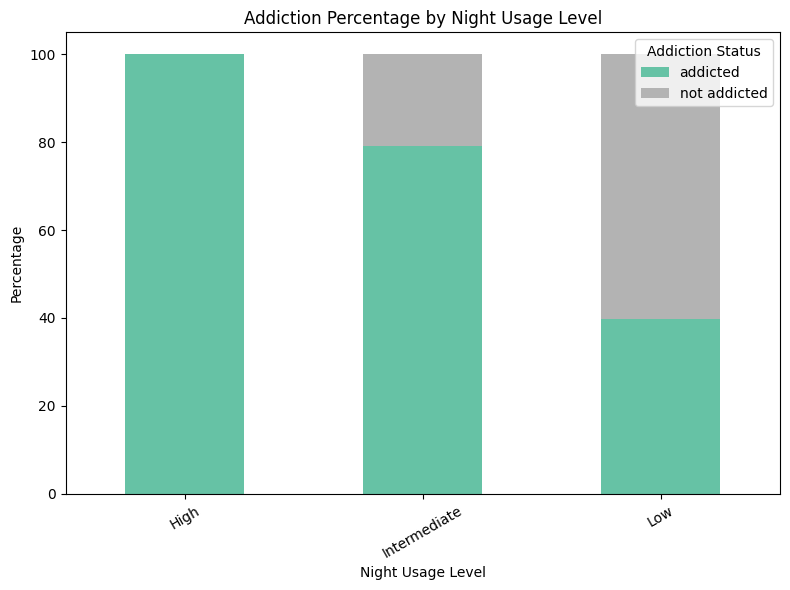

In [26]:
import matplotlib.pyplot as plt

grouped = data.groupby(['night_usage_levels', 'addicted'], observed=True).size().reset_index(name='count')

total_per_bin = grouped.groupby('night_usage_levels', observed=True)['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_bin * 100

pivot = grouped.pivot(index='night_usage_levels', columns='addicted', values='percentage').fillna(0)


column_map = {0: 'Not Addicted', 1: 'Addicted'}
pivot.columns = [column_map.get(c, str(c)) for c in pivot.columns]

# Plot
pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Addiction Percentage by Night Usage Level')
plt.xlabel('Night Usage Level')
plt.ylabel('Percentage')
plt.legend(title='Addiction Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Since "night_usage" column is the only one with 100% addiction in the high range, therefore this indicates that the night_usage has a great impact on addiction

In [27]:
#Categoraize "work_study_hours" column to show correlation with the target column "addicted"
def work_study_hours_levels(col):
    if col<=4:
        return "Low"
    elif col<=9:
        return "Intermediate"
    else:
        return "High"

data["work_study_hours_levels"] = data["work_study_hours"].apply(work_study_hours_levels)

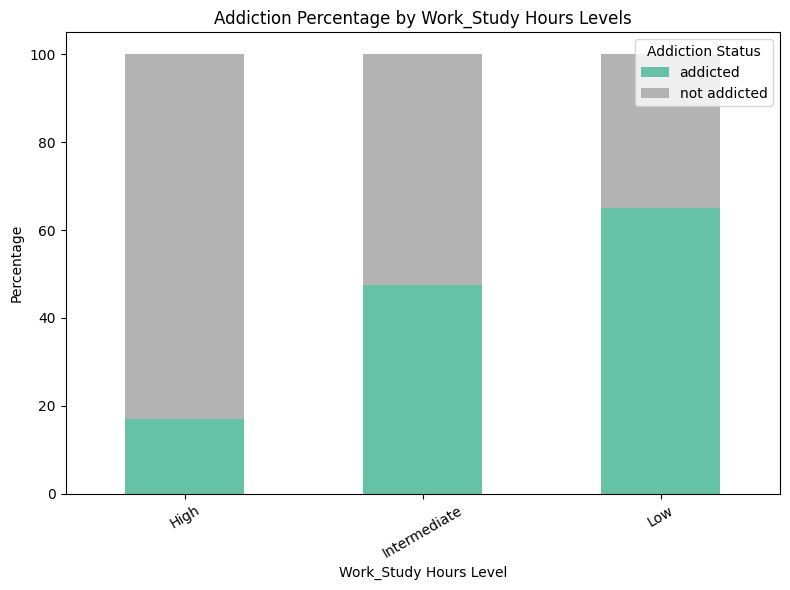

In [28]:
import matplotlib.pyplot as plt

grouped = data.groupby(['work_study_hours_levels', 'addicted'], observed=True).size().reset_index(name='count')

total_per_bin = grouped.groupby('work_study_hours_levels', observed=True)['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_bin * 100

pivot = grouped.pivot(index='work_study_hours_levels', columns='addicted', values='percentage').fillna(0)

column_map = {0: 'Not Addicted', 1: 'Addicted'}
pivot.columns = [column_map.get(c, str(c)) for c in pivot.columns]

pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Addiction Percentage by Work_Study Hours Levels')
plt.xlabel('Work_Study Hours Level')
plt.ylabel('Percentage')
plt.legend(title='Addiction Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


The more work or study hours the person do, The less probably they will be addicted to phone usage and vice versa.

In [29]:
def age_categories(col):
    if col<=25:
        return "Gen-Z(15-25)"
    elif col<40:
        return "Gen-Y(26-40)"
    else:
        return "Gen-X(41-55)"

data["age_categories"] = data["age"].apply(age_categories)

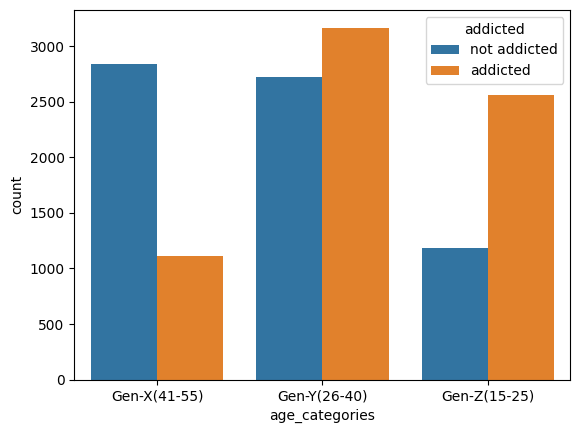

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='age_categories',data=data,hue="addicted")
plt.show()

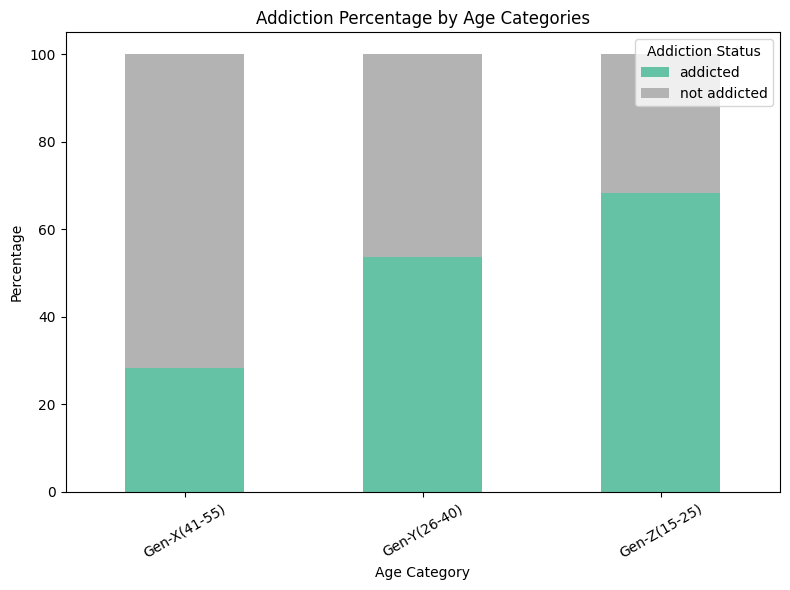

In [31]:
import matplotlib.pyplot as plt

grouped = data.groupby(['age_categories', 'addicted'], observed=True).size().reset_index(name='count')

total_per_bin = grouped.groupby('age_categories', observed=True)['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_bin * 100

pivot = grouped.pivot(index='age_categories', columns='addicted', values='percentage').fillna(0)

column_map = {0: 'Not Addicted', 1: 'Addicted'}
pivot.columns = [column_map.get(c, str(c)) for c in pivot.columns]

pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Addiction Percentage by Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Percentage')
plt.legend(title='Addiction Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

From the chart above, The percent of addiction increases significantly in Gen-Z which makes sense.

<Axes: xlabel='gaming_time', ylabel='Density'>

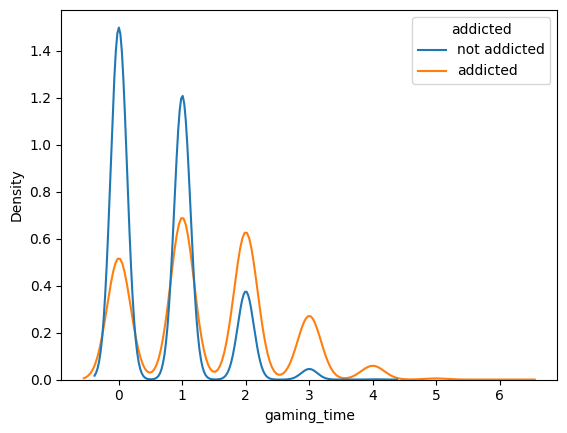

In [32]:
sns.kdeplot(data=data, x='gaming_time', hue='addicted', common_norm=False)

From the above KDE plot, It seems that the more gaming time the person spend, The more probably addicted they will be.

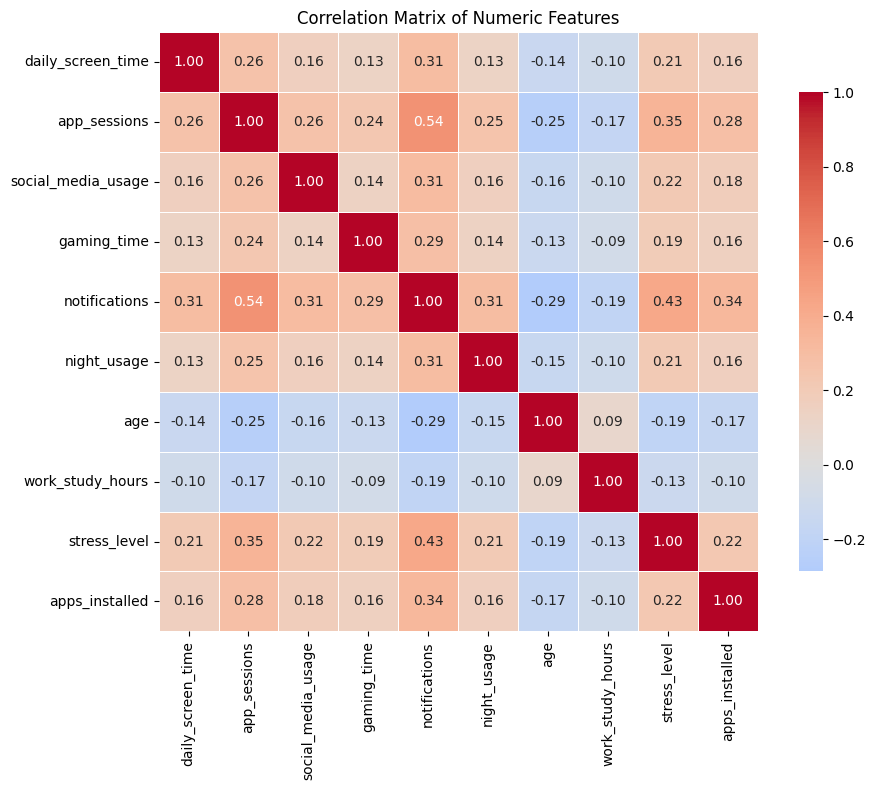

In [33]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Title and layout
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

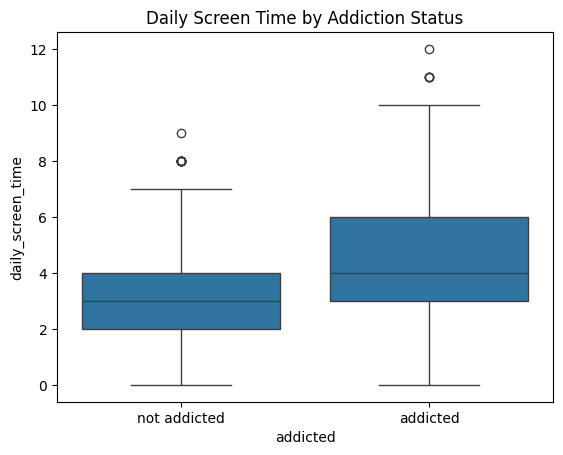

In [34]:
sns.boxplot(x='addicted', y='daily_screen_time', data=data)
plt.title('Daily Screen Time by Addiction Status')
plt.show()

Addicted people spend more time on their phones which makes sense.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   daily_screen_time          13589 non-null  int64 
 1   app_sessions               13589 non-null  int64 
 2   social_media_usage         13589 non-null  int64 
 3   gaming_time                13589 non-null  int64 
 4   notifications              13589 non-null  int64 
 5   night_usage                13589 non-null  int64 
 6   age                        13589 non-null  int64 
 7   work_study_hours           13589 non-null  int64 
 8   stress_level               13589 non-null  int64 
 9   apps_installed             13589 non-null  int64 
 10  addicted                   13589 non-null  object
 11  daily_screen_time_levels   13589 non-null  object
 12  social_media_usage_levels  13589 non-null  object
 13  night_usage_levels         13589 non-null  object
 14  work_s

In [36]:
from scipy.stats import pointbiserialr
import pandas as pd

# Map 'addicted' column to numeric binary
data['addicted'] = data['addicted'].map({'not addicted': 0, 'addicted': 1})

# Identify numeric columns safely (excluding 'addicted')
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'addicted']

# Dictionary to store correlation results
correlations = {}

# Compute point-biserial correlation
for col in numeric_cols:
    if data[col].nunique() > 1:
        subset = data[['addicted', col]].dropna()
        if len(subset) > 2:  # At least 3 valid rows needed
            corr, _ = pointbiserialr(subset['addicted'], subset[col])
            correlations[col] = corr

# Display sorted correlations
for col, val in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{col}: {val:.2f}")


notifications: 0.79
app_sessions: 0.67
stress_level: 0.54
apps_installed: 0.43
social_media_usage: 0.39
daily_screen_time: 0.38
night_usage: 0.38
age: -0.37
gaming_time: 0.36
work_study_hours: -0.25


##### From the previous cell, we've known the most linearly correlated features with the 'addicted' column

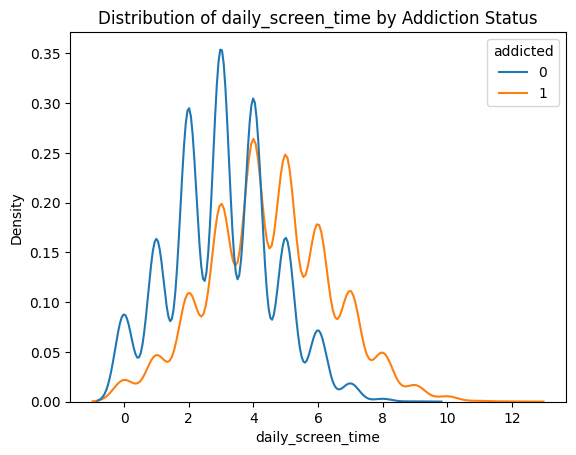

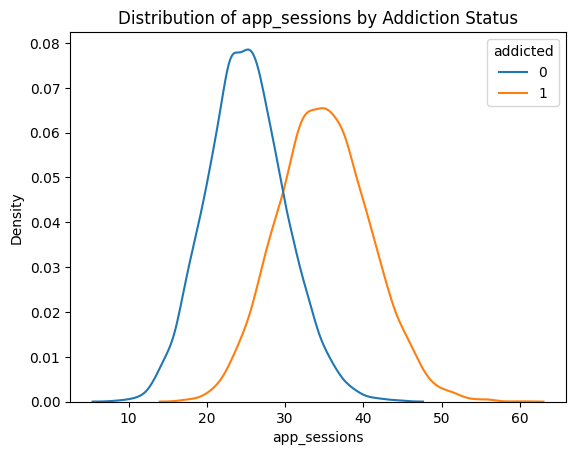

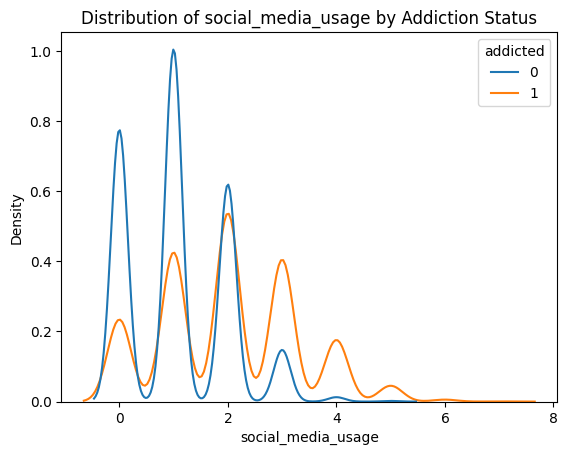

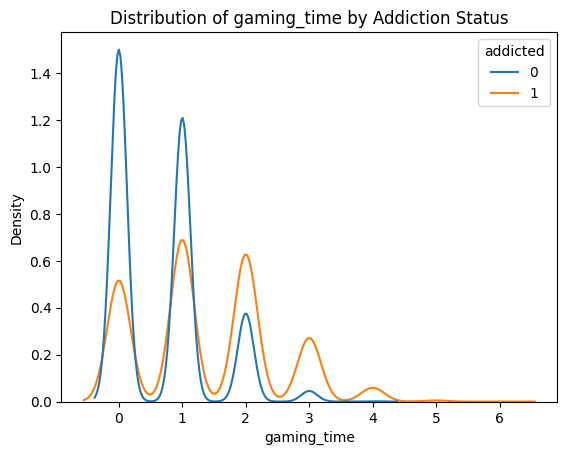

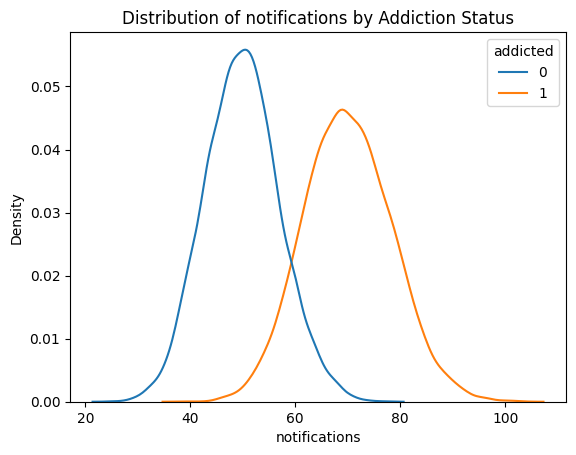

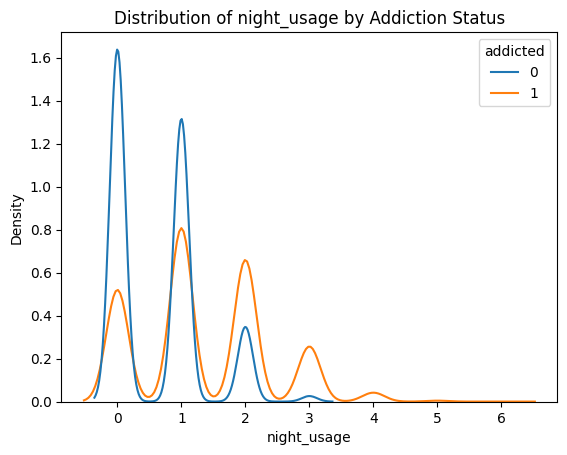

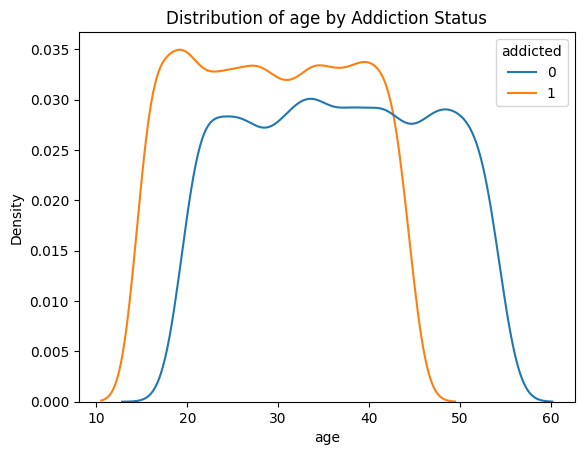

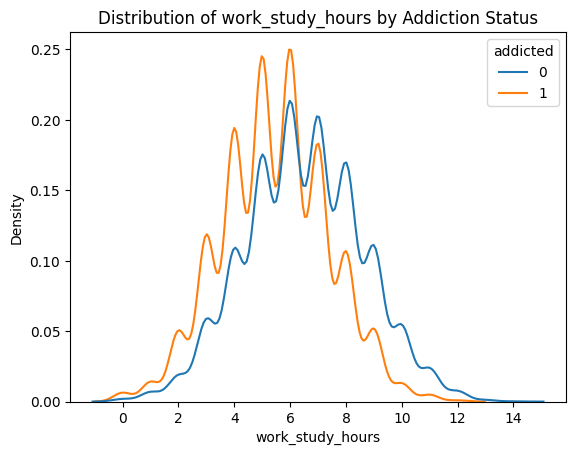

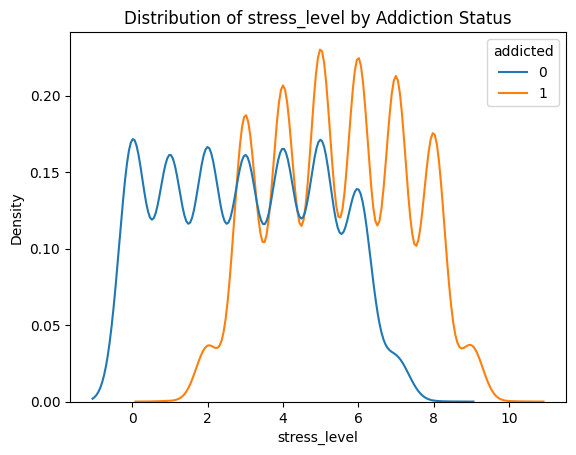

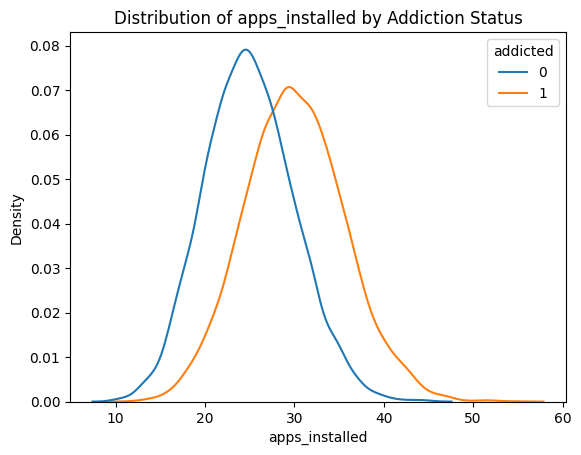

In [37]:
# show the distribution of numeric features by addiction status
for col in numeric_cols:
    sns.kdeplot(data=data, x=col, hue='addicted', common_norm=False)
    plt.title(f"Distribution of {col} by Addiction Status")
    plt.show()


#### The next section is to know the type of the correlation between the features and the target column

In [38]:
import statsmodels.formula.api as smf

# Add polynomial, exponential, and cubic terms to the continuous variable
data['screen_time_squared'] = data['daily_screen_time'] ** 2
data['screen_time_exp'] = np.exp(data['daily_screen_time'])
data['daily_screen_time_cubed'] = data['daily_screen_time'] ** 3

# Fit logistic regression with linear term
model_linear = smf.logit('addicted ~ daily_screen_time', data=data).fit()
print("Linear model AIC:", model_linear.aic)

# Fit logistic regression with quadratic term
model_quadratic = smf.logit('addicted ~ daily_screen_time + screen_time_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)

# Fit logistic regression with cubic term
model_cubic = smf.logit('addicted ~ daily_screen_time + screen_time_squared +daily_screen_time_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)

# Fit logistic regression with exponential term
model_exp = smf.logit('addicted ~ screen_time_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)


# Quadratic 

Optimization terminated successfully.
         Current function value: 0.613743
         Iterations 5
Linear model AIC: 16684.307942438405
Optimization terminated successfully.
         Current function value: 0.610862
         Iterations 6
Quadratic model AIC: 16608.010770794557
Optimization terminated successfully.
         Current function value: 0.610830
         Iterations 7
cubic model AIC: 16609.149041774657
Optimization terminated successfully.
         Current function value: 0.635530
         Iterations 9
Exponential model AIC: 17276.425378805143


In [39]:
print(model_quadratic.summary()) #the most proper model

                           Logit Regression Results                           
Dep. Variable:               addicted   No. Observations:                13589
Model:                          Logit   Df Residuals:                    13586
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 May 2025   Pseudo R-squ.:                  0.1187
Time:                        15:13:39   Log-Likelihood:                -8301.0
converged:                       True   LL-Null:                       -9418.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2444      0.071    -17.462      0.000      -1.384      -1.105
daily_screen_time       0.1335      0.040      3.355      0.001       0.056       0.211
screen_time_squa

In [40]:
data['social_media_usage_squared'] = data['social_media_usage'] ** 2
data['social_media_usage_exp'] = np.exp(data['social_media_usage'])
data['social_media_usage_cubed'] = data['social_media_usage'] ** 3


model_linear = smf.logit('addicted ~ social_media_usage', data=data).fit()
print("Linear model AIC:", model_linear.aic)


model_quadratic = smf.logit('addicted ~ social_media_usage + social_media_usage_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)

model_cubic = smf.logit('addicted ~ social_media_usage + social_media_usage_squared + social_media_usage_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)

model_exp = smf.logit('addicted ~ screen_time_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)

# Quadratic

Optimization terminated successfully.
         Current function value: 0.610398
         Iterations 5
Linear model AIC: 16593.40817993645
Optimization terminated successfully.
         Current function value: 0.604446
         Iterations 7
Quadratic model AIC: 16433.642980855584
Optimization terminated successfully.
         Current function value: 0.604421
         Iterations 8
cubic model AIC: 16434.944026863715
Optimization terminated successfully.
         Current function value: 0.635530
         Iterations 9
Exponential model AIC: 17276.425378805143


In [41]:
data['gaming_time_squared'] = data['gaming_time'] ** 2
data['gaming_time_exp'] = np.exp(data['gaming_time'])
data['gaming_time_cubed'] = data['gaming_time'] ** 3


model_linear = smf.logit('addicted ~ gaming_time', data=data).fit()
print("Linear model AIC:", model_linear.aic)


model_quadratic = smf.logit('addicted ~ gaming_time + gaming_time_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)


model_cubic = smf.logit('addicted ~ gaming_time + gaming_time_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)


model_exp = smf.logit('addicted ~ gaming_time_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)

# Quadratic

Optimization terminated successfully.
         Current function value: 0.622388
         Iterations 5
Linear model AIC: 16919.273131888996
Optimization terminated successfully.
         Current function value: 0.618676
         Iterations 6
Quadratic model AIC: 16820.372997405313
Optimization terminated successfully.
         Current function value: 0.619082
         Iterations 7
cubic model AIC: 16831.41335314575
Optimization terminated successfully.
         Current function value: 0.623498
         Iterations 7
Exponential model AIC: 16949.432140349112


In [42]:
data['night_usage_squared'] = data['night_usage'] ** 2
data['night_usage_exp'] = np.exp(data['night_usage'])
data['night_usage_cubed'] = data['night_usage'] ** 3


model_linear = smf.logit('addicted ~ night_usage', data=data).fit()
print("Linear model AIC:", model_linear.aic)


model_quadratic = smf.logit('addicted ~ night_usage + night_usage_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)


model_cubic = smf.logit('addicted ~ night_usage + night_usage_squared + night_usage_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)


model_exp = smf.logit('addicted ~ night_usage_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)

# Quadratic

Optimization terminated successfully.
         Current function value: 0.614574
         Iterations 5
Linear model AIC: 16706.89090544233
Optimization terminated successfully.
         Current function value: 0.611105
         Iterations 7
Quadratic model AIC: 16614.62137848617
Optimization terminated successfully.
         Current function value: 0.611083
         Iterations 8
cubic model AIC: 16616.019521346123
Optimization terminated successfully.
         Current function value: 0.614624
         Iterations 7
Exponential model AIC: 16708.246375275554


In [43]:
data['work_study_hours_squared'] = data['work_study_hours'] ** 2
data['work_study_hours_exp'] = np.exp(data['work_study_hours'])
data['work_study_hours_cubed'] = data['work_study_hours'] ** 3


model_linear = smf.logit('addicted ~ work_study_hours', data=data).fit()
print("Linear model AIC:", model_linear.aic)


model_quadratic = smf.logit('addicted ~ work_study_hours + work_study_hours_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)


model_cubic = smf.logit('addicted ~ work_study_hours + work_study_hours_squared + work_study_hours_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)


model_exp = smf.logit('addicted ~ work_study_hours_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)

# Quadratic 

Optimization terminated successfully.
         Current function value: 0.660788
         Iterations 5
Linear model AIC: 17962.89581179966
Optimization terminated successfully.
         Current function value: 0.659371
         Iterations 5
Quadratic model AIC: 17926.372266064354
Optimization terminated successfully.
         Current function value: 0.659335
         Iterations 6
cubic model AIC: 17927.41449533854
Optimization terminated successfully.
         Current function value: 0.677173
         Iterations 7
Exponential model AIC: 18408.196316332418


In [44]:
data['notifications_squared'] = data['notifications'] ** 2
data['notifications_exp'] = np.exp(data['notifications'])
data['notifications_cubed'] = data['notifications'] ** 3


model_linear = smf.logit('addicted ~ notifications', data=data).fit()
print("Linear model AIC:", model_linear.aic)


model_quadratic = smf.logit('addicted ~ notifications + notifications_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)


model_cubic = smf.logit('addicted ~ notifications + notifications_squared + notifications_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)


model_exp = smf.logit('addicted ~ notifications_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)

# Linear, which makes sense as we know from point biser correlation

Optimization terminated successfully.
         Current function value: 0.229072
         Iterations 8
Linear model AIC: 6229.719704111982
Optimization terminated successfully.
         Current function value: 0.229071
         Iterations 9
Quadratic model AIC: 6231.702886487478
Optimization terminated successfully.
         Current function value: 0.229039
         Iterations 12
cubic model AIC: 6232.820999798214
         Current function value: 0.565331
         Iterations: 35
Exponential model AIC: 15368.553320658022


c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [45]:
data['app_sessions_squared'] = data['app_sessions'] ** 2
data['app_sessions_exp'] = np.exp(data['app_sessions'])
data['app_sessions_cubed'] = data['app_sessions'] ** 3


model_linear = smf.logit('addicted ~ app_sessions', data=data).fit()
print("Linear model AIC:", model_linear.aic)


model_quadratic = smf.logit('addicted ~ app_sessions + app_sessions_squared', data=data).fit()
print("Quadratic model AIC:", model_quadratic.aic)


model_cubic = smf.logit('addicted ~ app_sessions + app_sessions_squared + app_sessions_cubed', data=data).fit()
print("cubic model AIC:", model_cubic.aic)


model_exp = smf.logit('addicted ~ app_sessions_exp', data=data).fit()
print("Exponential model AIC:", model_exp.aic)

# Quadratic

Optimization terminated successfully.
         Current function value: 0.398901
         Iterations 7
Linear model AIC: 10845.34114219502
Optimization terminated successfully.
         Current function value: 0.398827
         Iterations 7
Quadratic model AIC: 10845.31641418537
Optimization terminated successfully.
         Current function value: 0.398803
         Iterations 9
cubic model AIC: 10846.655318048415
Optimization terminated successfully.
         Current function value: 0.643527
         Iterations 26
Exponential model AIC: 17493.781399408974


#### Data Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Add some noise to the data as it's discrete
# This is to simulate a more realistic scenario where the data might have some variability
np.random.seed(42)
columns_to_perturb = ['social_media_usage', 'night_usage','daily_screen_time','gaming_time','work_study_hours']

for col in columns_to_perturb:
    data[col] = data[col] + np.random.normal(0, 0.1, size=len(data))


scaler = MinMaxScaler()
cols = ['social_media_usage','app_sessions','daily_screen_time','age','apps_installed','stress_level','notifications','gaming_time','work_study_hours','night_usage']
data[cols] = scaler.fit_transform(data[cols]) #scale the data before applying the formula

#### Create the numerical column to predict

In [47]:
#Create the addiction score column using the most significant features
data['Addiction_Score'] = (
    0.6 * data['social_media_usage']**2 +
    0.4 * data['notifications'] +
    np.random.normal(0, 0.01, size=len(data)) # Add some noise
)

data[['Addiction_Score']] = scaler.fit_transform(data[['Addiction_Score']])

In [48]:
data.columns

Index(['daily_screen_time', 'app_sessions', 'social_media_usage',
       'gaming_time', 'notifications', 'night_usage', 'age',
       'work_study_hours', 'stress_level', 'apps_installed', 'addicted',
       'daily_screen_time_levels', 'social_media_usage_levels',
       'night_usage_levels', 'work_study_hours_levels', 'age_categories',
       'screen_time_squared', 'screen_time_exp', 'daily_screen_time_cubed',
       'social_media_usage_squared', 'social_media_usage_exp',
       'social_media_usage_cubed', 'gaming_time_squared', 'gaming_time_exp',
       'gaming_time_cubed', 'night_usage_squared', 'night_usage_exp',
       'night_usage_cubed', 'work_study_hours_squared', 'work_study_hours_exp',
       'work_study_hours_cubed', 'notifications_squared', 'notifications_exp',
       'notifications_cubed', 'app_sessions_squared', 'app_sessions_exp',
       'app_sessions_cubed', 'Addiction_Score'],
      dtype='object')

In [49]:
data.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,...,work_study_hours_squared,work_study_hours_exp,work_study_hours_cubed,notifications_squared,notifications_exp,notifications_cubed,app_sessions_squared,app_sessions_exp,app_sessions_cubed,Addiction_Score
0,0.183565,0.403846,0.061113,0.065445,0.307692,0.061738,0.725,0.381844,0.3,0.555556,...,25,148.413159,125,2401,1.907347e+21,117649,841,3.931334e+12,24389,0.171758
1,0.509831,0.403846,0.190623,0.373327,0.512821,0.196648,0.350,0.374602,0.9,0.244444,...,25,148.413159,125,4225,1.694889e+28,274625,841,3.931334e+12,24389,0.295326
2,0.753480,0.384615,0.339784,0.049465,0.410256,0.537730,0.325,0.499973,0.5,0.644444,...,49,1096.633158,343,3249,5.685720e+24,185193,784,1.446257e+12,21952,0.276408
3,0.507093,0.596154,0.351890,0.075988,0.564103,0.186772,0.325,0.433122,0.8,0.311111,...,36,403.428793,216,4761,9.253782e+29,328509,1521,8.659340e+16,59319,0.372118
4,0.421927,0.557692,0.465881,0.205497,0.500000,0.381394,0.300,0.310367,0.5,0.355556,...,16,54.598150,64,4096,6.235149e+27,262144,1369,1.171914e+16,50653,0.388868


In [50]:
data.describe()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,...,work_study_hours_squared,work_study_hours_exp,work_study_hours_cubed,notifications_squared,notifications_exp,notifications_cubed,app_sessions_squared,app_sessions_exp,app_sessions_cubed,Addiction_Score
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,...,13589.000000,1.358900e+04,13589.000000,13589.000000,1.358900e+04,1.358900e+04,13589.000000,1.358900e+04,13589.000000,13589.000000
mean,0.328003,0.423800,0.268007,0.225431,0.448914,0.209248,0.451393,0.440740,0.426529,0.389601,...,40.027669,3.450602e+03,291.366399,3763.930532,5.557015e+40,2.456997e+05,957.111119,9.621564e+21,32139.138053,0.299607
std,0.155166,0.142434,0.167287,0.153844,0.163232,0.144411,0.252954,0.146751,0.228845,0.130995,...,25.836334,1.881495e+04,277.973099,1566.004016,4.727102e+42,1.509209e+05,462.936290,9.806927e+23,23238.127489,0.123817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000e+00,0.000000,625.000000,7.200490e+10,1.562500e+04,64.000000,2.980958e+03,512.000000,0.000000
25%,0.198325,0.326923,0.175674,0.074234,0.320513,0.066918,0.250000,0.361046,0.300000,0.288889,...,25.000000,1.484132e+02,125.000000,2500.000000,5.184706e+21,1.250000e+05,625.000000,7.200490e+10,15625.000000,0.202584
50%,0.340119,0.423077,0.211253,0.216207,0.435897,0.205785,0.450000,0.441346,0.400000,0.377778,...,36.000000,4.034288e+02,216.000000,3481.000000,4.201210e+25,2.053790e+05,900.000000,1.068647e+13,27000.000000,0.280639
75%,0.429497,0.519231,0.344212,0.361275,0.576923,0.341891,0.650000,0.521456,0.600000,0.466667,...,49.000000,1.096633e+03,343.000000,4900.000000,2.515439e+30,3.430000e+05,1225.000000,1.586013e+15,42875.000000,0.375842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,196.000000,1.202604e+06,2744.000000,10609.000000,5.399228e+44,1.092727e+06,3600.000000,1.142007e+26,216000.000000,1.000000


In [51]:
# Calculate point-biserial correlation
correlation, p_value = pointbiserialr(data['addicted'], data['Addiction_Score'])

print(f"Point-Biserial Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.719
P-value: 0.000


#### From the previous test, we can conclude that addiction_score is a very good indicator for the addicted status.

#### -----------------------------------------------

#### Regression Models Start

In [52]:
#Select features and target variable
X=['daily_screen_time','age','apps_installed','stress_level','gaming_time','work_study_hours','night_usage','app_sessions','social_media_usage']
y=['Addiction_Score']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size = 0.2, random_state = 42)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score:", r2_score(y_test, y_pred))

MSE: 0.004030464210729588
MAE: 0.049946744702589994
RMSE: 0.06348593710995837
r2_score: 0.7432471578561385


In [54]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features (degree 3 in this case)
poly = PolynomialFeatures(degree=3)

# Transform X_train and X_test to include polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Predict on the test set
y_predicted = poly_reg_model.predict(X_test_poly)


# Print the results
print("MSE:", mean_squared_error(y_test, y_predicted))
print("MAE:", mean_absolute_error(y_test, y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
print("r2_score:", r2_score(y_test, y_predicted))

MSE: 0.0030605780488709147
MAE: 0.04378320230434535
RMSE: 0.055322491347289435
r2_score: 0.8050318594670078


In [55]:
from xgboost import XGBRegressor
from sklearn import metrics

# Initialize and train the XGBoost Regressor
regressor = XGBRegressor(n_estimators=200, learning_rate=0.03, random_state=42)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluation Metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MSE: 0.003055067267268896
MAE: 0.0433606319129467
RMSE: 0.05527266292905469
R2 Score: 0.8053829669952393


In [56]:
import lightgbm as lgb
import numpy as np

# Initialize and train the model
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.03, random_state=42)
lgb_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Results")
print("MSE:", mean_squared_error(y_test, y_pred_lgb))
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print("R2 Score:", r2_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 10871, number of used features: 9
[LightGBM] [Info] Start training from score 0.299022
LightGBM Results
MSE: 0.0030253903359565865
MAE: 0.04319529413939917
RMSE: 0.05500354839423168
R2 Score: 0.8072734239188755


##### Regression Models End

#### ------------------------------------------------------------------------------------------

#### Classification models start

In [57]:
#Select features and target variable
X=['daily_screen_time','age','apps_installed','stress_level','notifications','gaming_time','work_study_hours','night_usage','app_sessions','social_media_usage']
y=['addicted']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size = 0.2, random_state = 42)

In [58]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Logistic Regression Accuracy : {accuracy}")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(f"Confusion Matrix:\n{conf_matrix}")

Logistic Regression Accuracy : 0.9808682855040471
Precision: 0.9832848837209303
Recall: 0.9790159189580319
F1 Score: 0.981145757795504
Confusion Matrix:
[[1313   23]
 [  29 1353]]


c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-

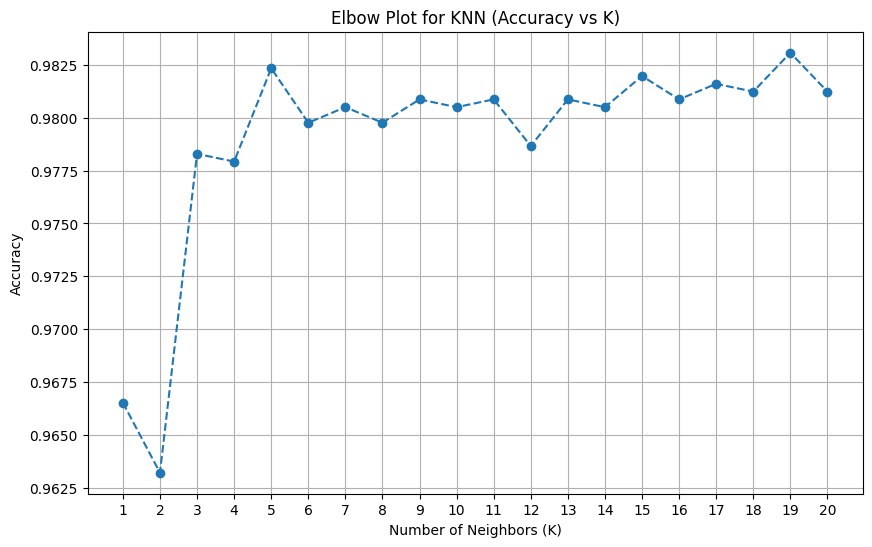

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Elbow method to determine the best K
k_range = range(1, 21)
knn_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    score = accuracy_score(y_test, preds)
    knn_scores.append(score)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, knn_scores, marker='o', linestyle='--')
plt.title('Elbow Plot for KNN (Accuracy vs K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [60]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier

k = 5 # Choose the best K from the elbow plot

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"KNN Accuracy : {accuracy}")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(f"Confusion Matrix:\n{conf_matrix}")

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNN Accuracy : 0.9823399558498896
Precision: 0.9868613138686131
Recall: 0.9782923299565847
F1 Score: 0.9825581395348837
Confusion Matrix:
[[1318   18]
 [  30 1352]]


In [61]:
# Apply XGboost
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb.predict(X_test)

# Evaluate predictions
print("XGboost Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning:

[15:13:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGboost Accuracy: 0.9827078734363502
Precision: 0.9812545061283345
Recall: 0.9848046309696092
F1 Score: 0.9830263633080535
Confusion Matrix:
 [[1310   26]
 [  21 1361]]


In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Evaluate predictions
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Accuracy: 0.9816041206769683
Precision: 0.9812138728323699
Recall: 0.9826338639652678
F1 Score: 0.9819233550253073
Confusion Matrix:
 [[1310   26]
 [  24 1358]]


#### Classification Models End

#### --------------------------------------------------------------------

#### Project Done

#### ---------------------------------------

### Dashboard

In [63]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import socket



# Categorical columns for dropdown
categorical_cols = ['daily_screen_time_levels', 'social_media_usage_levels',
                    'night_usage_levels', 'work_study_hours_levels', 'age_categories']

# Numerical columns for box plot and histogram
numerical_cols = ['daily_screen_time', 'app_sessions', 'social_media_usage', 'gaming_time', 
                  'notifications', 'night_usage', 'age', 'work_study_hours', 'stress_level', 
                  'apps_installed', 'Addiction_Score']

# Create Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H2("Smartphone Addiction Dashboard", style={'textAlign': 'center'}),

    # Stacked Bar Chart Section
    html.Div([
        html.H4("Addiction Percentage by Category"),
        html.Label("Select a Category Level:"),
        dcc.Dropdown(
            id='category-dropdown',
            options=[{'label': col.replace('_', ' ').title(), 'value': col} for col in categorical_cols],
            value='daily_screen_time_levels'
        ),
        dcc.Graph(id='addiction-bar-chart')
    ], style={'marginBottom': '30px'}),

    # Box Plot Section
    html.Div([
        html.H4("Distribution of Numerical Variable by Addiction Status"),
        html.Label("Select a Numerical Variable:"),
        dcc.Dropdown(
            id='numerical-box-dropdown',
            options=[{'label': col.replace('_', ' ').title(), 'value': col} for col in numerical_cols],
            value='apps_installed'
        ),
        dcc.Graph(id='box-plot')
    ], style={'marginBottom': '30px'}),

    # Histogram Section
    html.Div([
        html.H4("Histogram of Numerical Variable by Addiction Status"),
        html.Label("Select a Numerical Variable:"),
        dcc.Dropdown(
            id='numerical-hist-dropdown',
            options=[{'label': col.replace('_', ' ').title(), 'value': col} for col in numerical_cols],
            value='Addiction_Score'
        ),
        dcc.Graph(id='histogram')
    ])
])

# Callback for the stacked bar chart
@app.callback(
    Output('addiction-bar-chart', 'figure'),
    Input('category-dropdown', 'value')
)
def update_bar_chart(selected_column):
    if selected_column not in data.columns:
        return {}

    # Group and calculate percentages
    grouped = data.groupby([selected_column, 'addicted']).size().reset_index(name='count')
    total_per_group = grouped.groupby(selected_column)['count'].transform('sum')
    grouped['percentage'] = grouped['count'] / total_per_group * 100

    fig = px.bar(
        grouped,
        x=selected_column,
        y='percentage',
        color='addicted',
        barmode='stack',
        title=f"Addiction Percentage by {selected_column.replace('_', ' ').title()}",
        labels={selected_column: selected_column.replace('_', ' ').title(), 'percentage': 'Percentage'},
        color_discrete_map={'not addicted': '#1f77b4', 'addicted': '#ff7f0e'}
    )
    return fig

# Callback for the box plot
@app.callback(
    Output('box-plot', 'figure'),
    Input('numerical-box-dropdown', 'value')
)
def update_box_plot(selected_numerical):
    if selected_numerical not in data.columns:
        return {}

    fig = px.box(
        data,
        x='addicted',
        y=selected_numerical,
        title=f"Distribution of {selected_numerical.replace('_', ' ').title()} by Addiction Status",
        labels={'addicted': 'Addiction Status', selected_numerical: selected_numerical.replace('_', ' ').title()},
        color='addicted',
        color_discrete_map={'not addicted': '#1f77b4', 'addicted': '#ff7f0e'}
    )
    return fig

# Callback for the histogram
@app.callback(
    Output('histogram', 'figure'),
    Input('numerical-hist-dropdown', 'value')
)
def update_histogram(selected_numerical):
    if selected_numerical not in data.columns:
        return {}

    fig = px.histogram(
        data,
        x=selected_numerical,
        color='addicted',
        barmode='overlay',
        title=f"Distribution of {selected_numerical.replace('_', ' ').title()} by Addiction Status",
        labels={selected_numerical: selected_numerical.replace('_', ' ').title()},
        color_discrete_map={'not addicted': '#1f77b4', 'addicted': '#ff7f0e'},
        opacity=0.7
    )
    return fig

# Function to find an available port
def find_available_port(start_port=8050):
    port = start_port
    while True:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            try:
                s.bind(('127.0.0.1', port))
                return port
            except OSError:
                port += 1

# Run the app
if __name__ == '__main__':
    port = find_available_port(8050)
    print(f"Starting Dash app on http://127.0.0.1:{port}")
    app.run(debug=True, host='127.0.0.1', port=port)

Starting Dash app on http://127.0.0.1:8050
